In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/students.csv')

 Top 11 Records

In [4]:
df.head(11)

,gender,race_ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score
0,male,group C,bachelor's degree,none,21,75,47
1,female,group A,high school,none,38,56,80
2,male,group C,master's degree,completed,90,74,17
3,female,group A,some high school,completed,16,97,68
4,female,group D,some high school,none,37,21,55
5,female,group B,associate's degree,completed,94,56,50
6,female,group D,master's degree,completed,38,46,41
7,male,group C,some college,completed,75,60,71
8,male,group A,some college,completed,89,93,62
9,female,group D,high school,completed,78,64,37


shape of the dataset

In [5]:
df.shape

(100000, 7)

Check Missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Check Duplicates

In [7]:
df.duplicated().sum()

60

Check Null and Dtypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   gender                       100000 non-null  object
 1   race_ethnicity               100000 non-null  object
 2   parental_level_of_education  100000 non-null  object
 3   test_preparation_course      100000 non-null  object
 4   math_score                   100000 non-null  int64 
 5   reading_score                100000 non-null  int64 
 6   writing_score                100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


 Exploring Data

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score
0,male,group C,bachelor's degree,none,21,75,47
1,female,group A,high school,none,38,56,80
2,male,group C,master's degree,completed,90,74,17
3,female,group A,some high school,completed,16,97,68
4,female,group D,some high school,none,37,21,55


In [10]:
df.describe()

,math_score,reading_score,writing_score
count,100000.000000,100000.000000,100000.000000
mean,54.846910,55.098570,54.944110
std,26.236988,26.248783,26.314258
min,10.000000,10.000000,10.000000
25%,32.000000,32.000000,32.000000
50%,55.000000,55.000000,55.000000
75%,78.000000,78.000000,78.000000
max,100.000000,100.000000,100.000000


From above description of numerical data, all means are very close to each other - between 54.84 and 55.09;
All standard deviations are also close - between 26.23 and 26.31;
While there is a minimum score 10 for math,reading and writing are equal.

In [11]:
df.nunique()

gender                          2
race_ethnicity                  4
parental_level_of_education     6
test_preparation_course         2
math_score                     91
reading_score                  91
writing_score                  91
dtype: int64

In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())


print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['male' 'female']
Categories in 'race_ethnicity' variable:   ['group C' 'group A' 'group D' 'group B']
Categories in'parental level of education' variable: ["bachelor's degree" 'high school' "master's degree" 'some high school'
 "associate's degree" 'some college']
Categories in 'test preparation course' variable:      ['none' 'completed']


define numerical & categorical columns

In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# printing the columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 4 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'test_preparation_course']


 Adding columns for "Total Score" and "Average

In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,male,group C,bachelor's degree,none,21,75,47,143,47.666667
1,female,group A,high school,none,38,56,80,174,58.000000
2,male,group C,master's degree,completed,90,74,17,181,60.333333
3,female,group A,some high school,completed,16,97,68,181,60.333333
4,female,group D,some high school,none,37,21,55,113,37.666667


 students with full marks in maths,writingand reading

In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 1053
Number of students with full marks in Writing: 1068
Number of students with full marks in Reading: 1072


 Exploring Data ( Visualization )

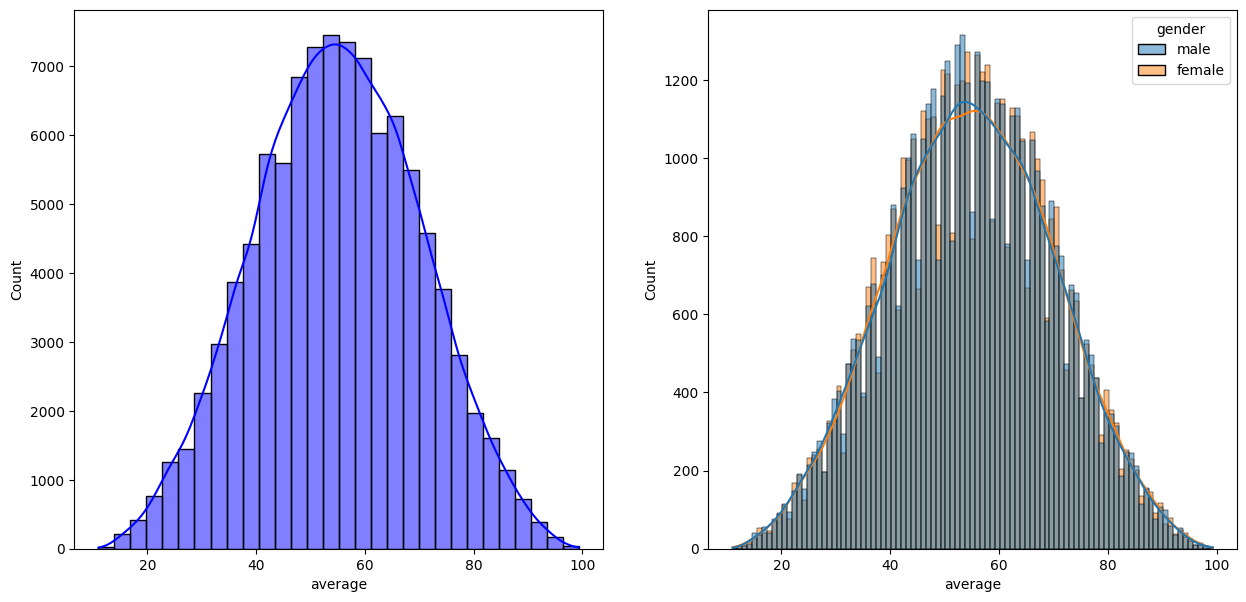

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

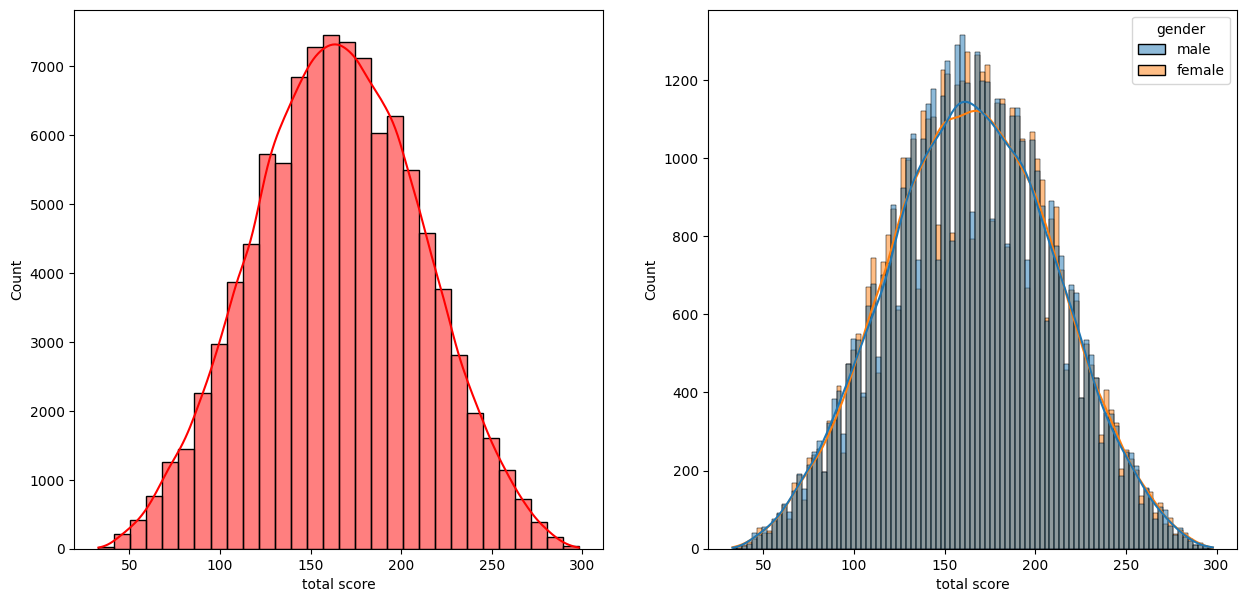

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

* Female students tend to perform well then male students.

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,male,group C,bachelor's degree,none,21,75,47,143,47.666667
1,female,group A,high school,none,38,56,80,174,58.000000
2,male,group C,master's degree,completed,90,74,17,181,60.333333
3,female,group A,some high school,completed,16,97,68,181,60.333333
4,female,group D,some high school,none,37,21,55,113,37.666667


now table adding two more columns "average" and "total_score"

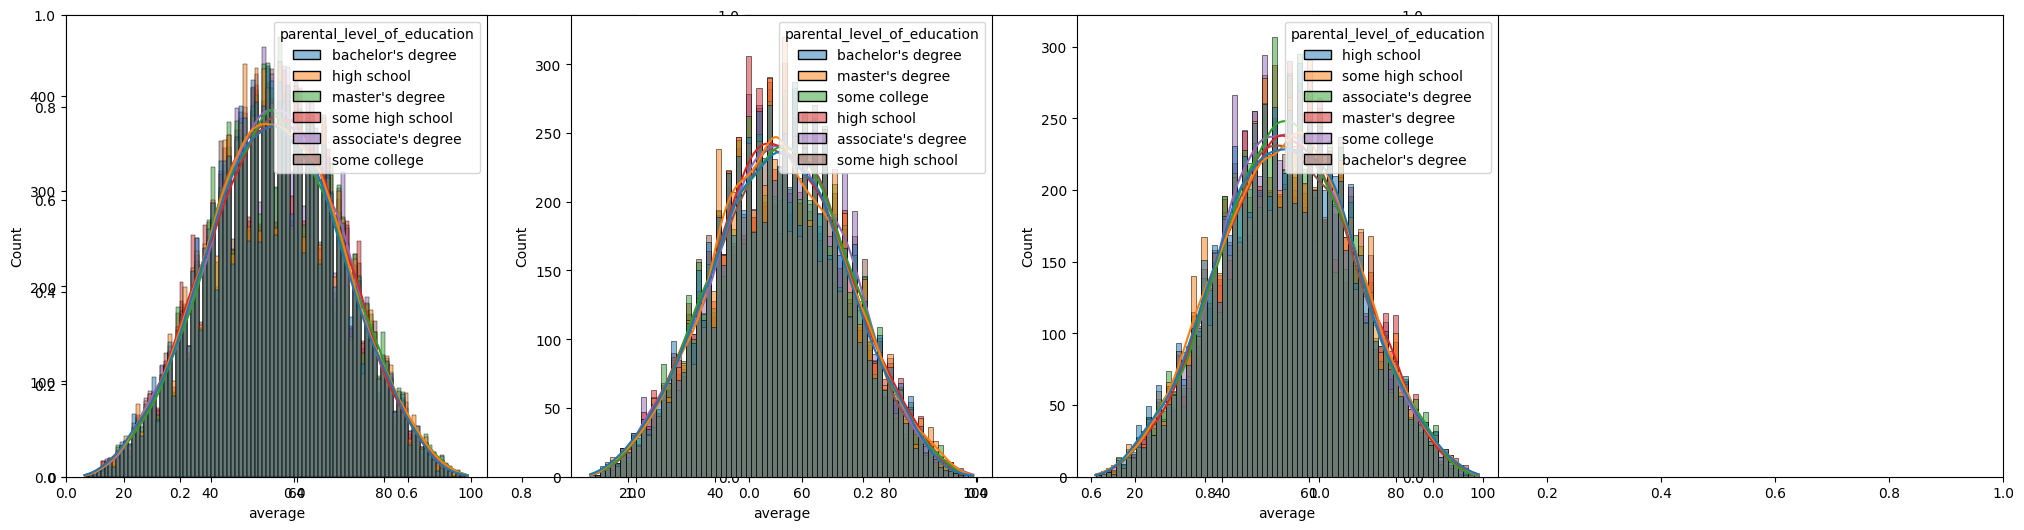

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()


* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.


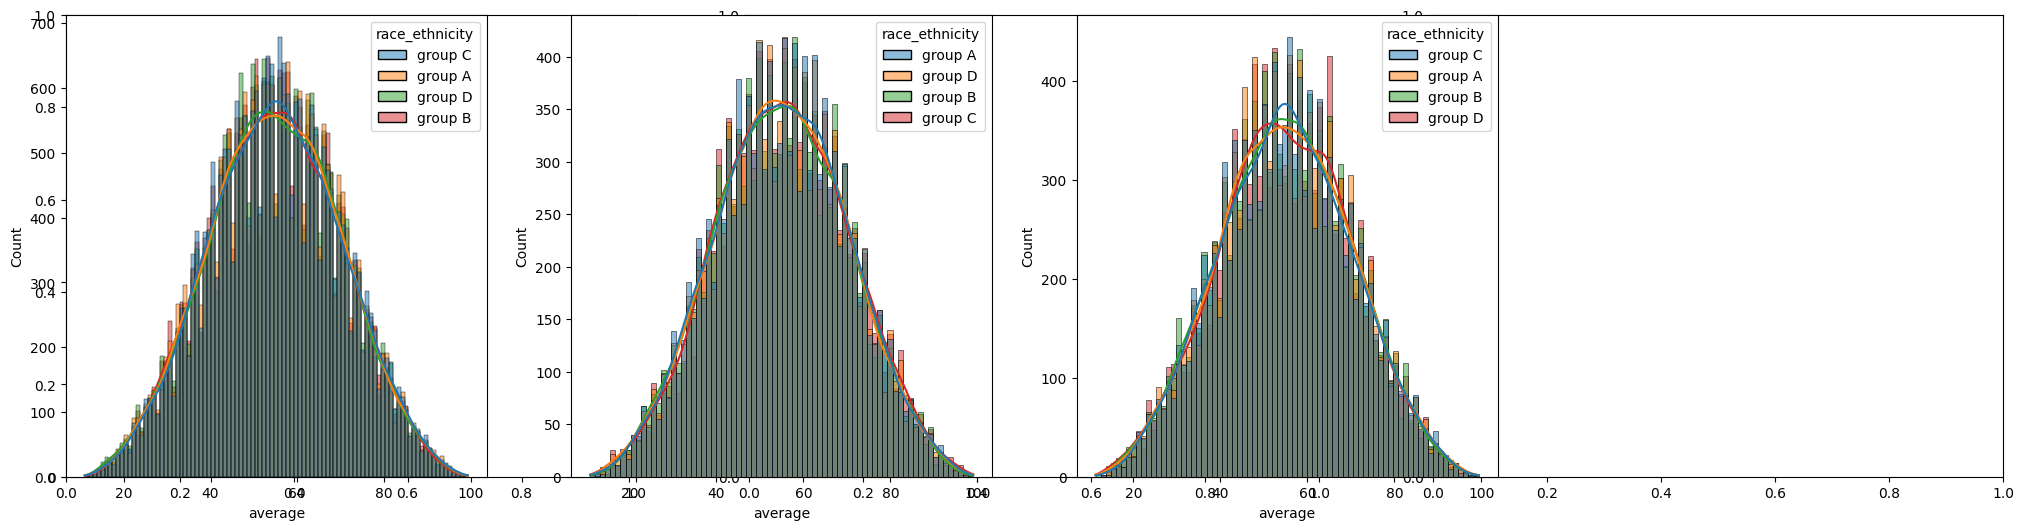

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female


Maximumum score of students in all three subjects

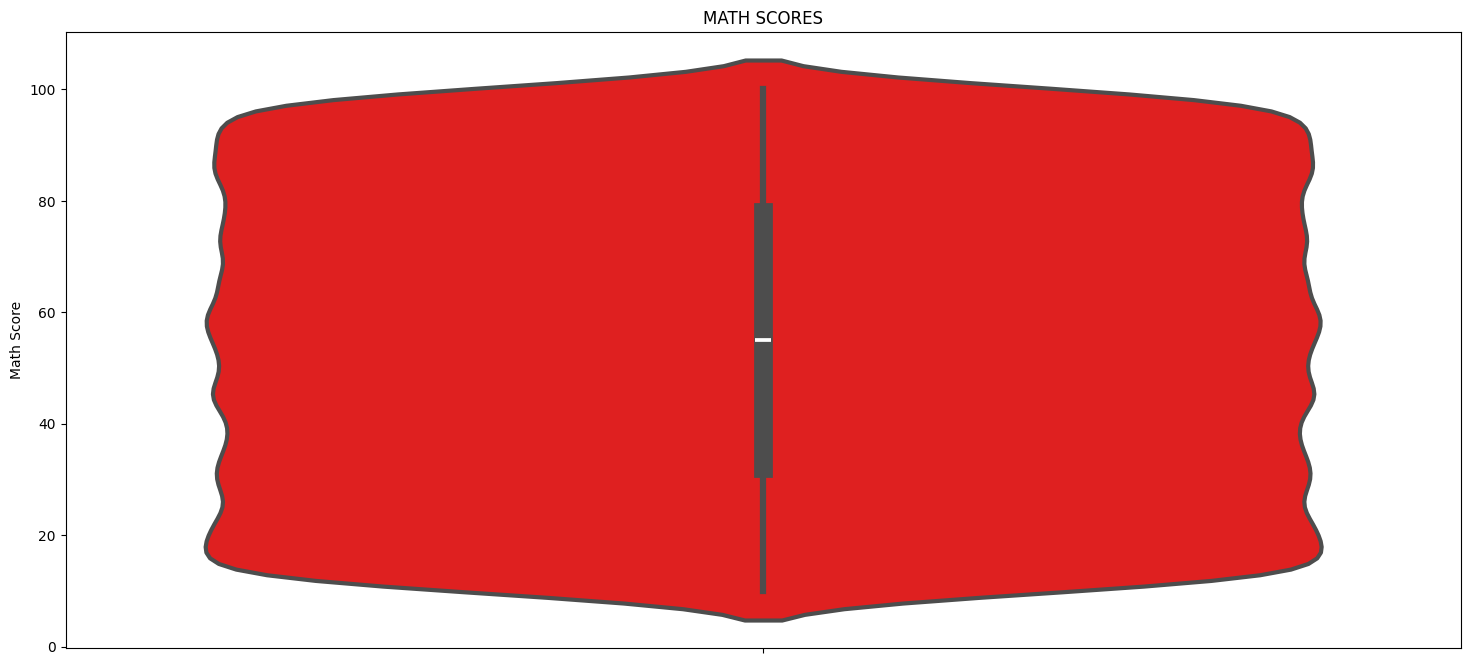

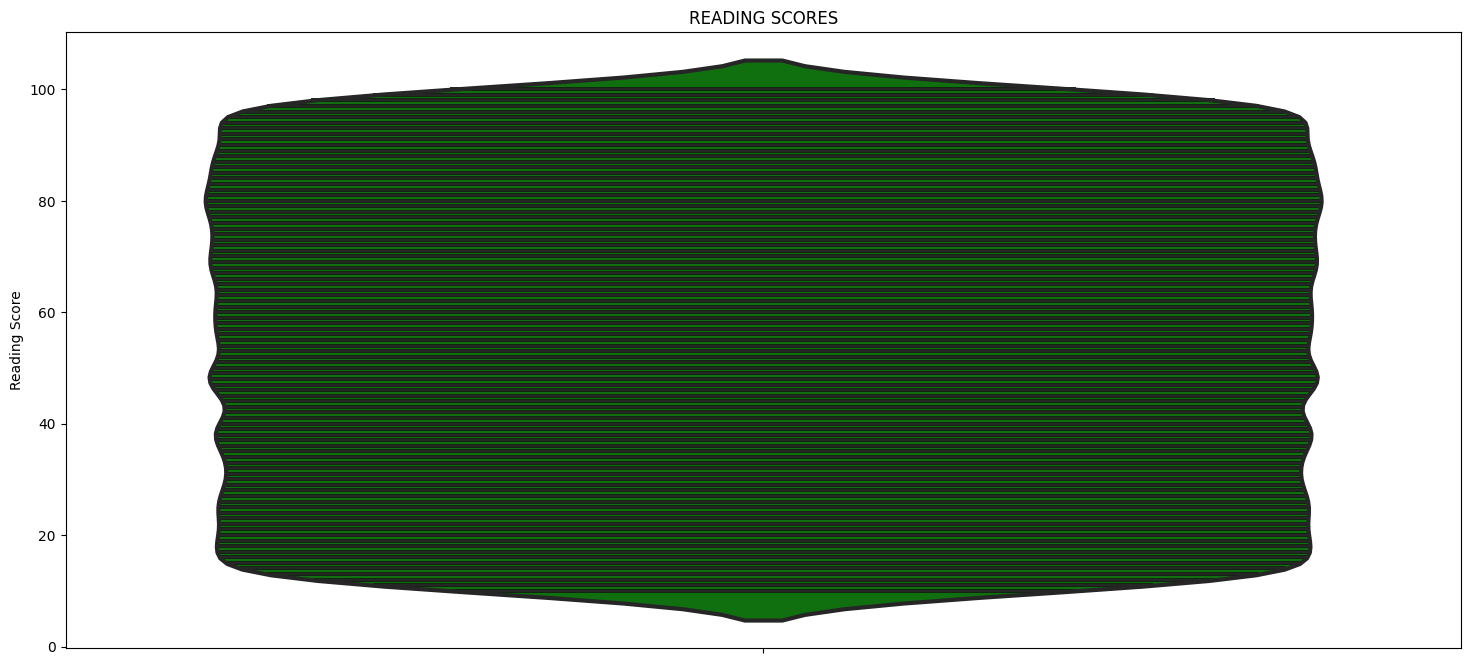

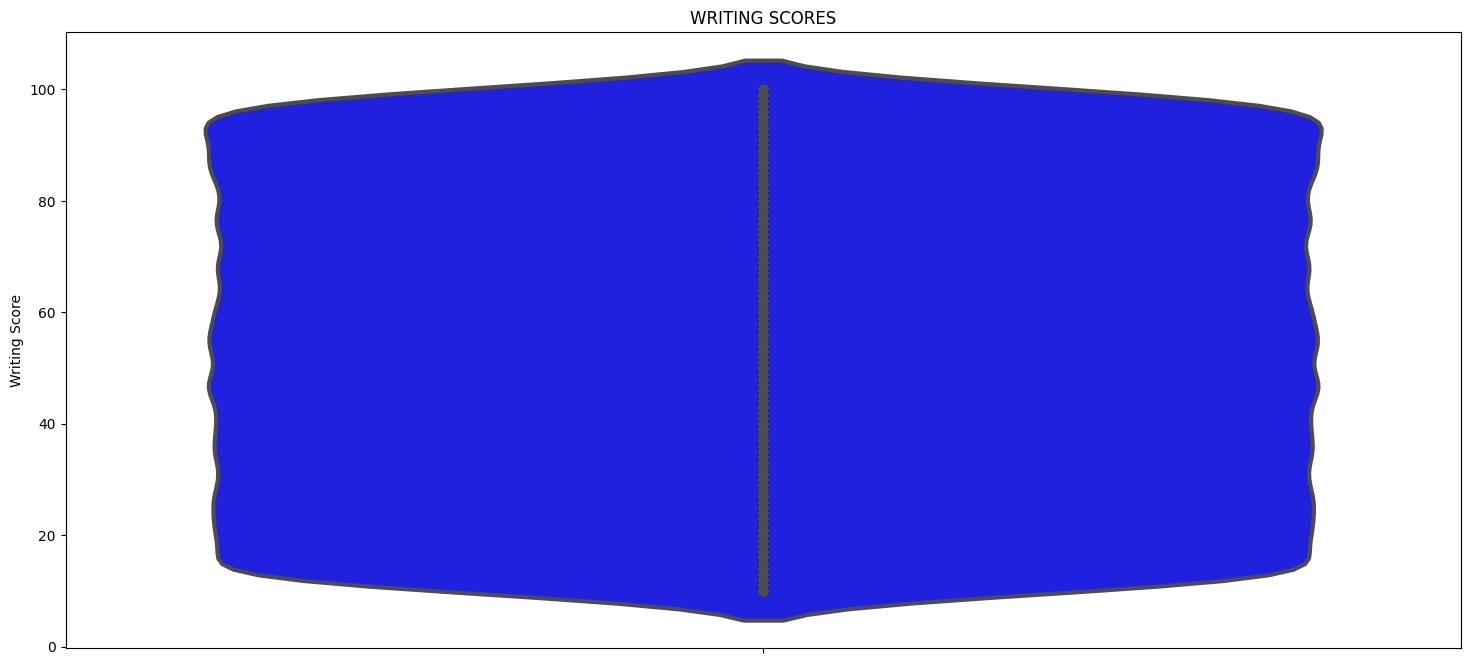

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))

# Customizing violin plots
sns.violinplot(y='math_score', data=df, color='red', linewidth=3, scale='count', inner='box', orient='v')
plt.title('MATH SCORES')
plt.ylabel('Math Score')
plt.xlabel('')

plt.figure(figsize=(18, 8))
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3, scale='width', inner='stick', orient='v')
plt.title('READING SCORES')
plt.ylabel('Reading Score')
plt.xlabel('')

plt.figure(figsize=(18, 8))
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3, scale='area', inner='point', orient='v')
plt.title('WRITING SCORES')
plt.ylabel('Writing Score')
plt.xlabel('')

plt.show()


 Multivariate analysis using pieplot

KeyError: 'race/ethnicity'

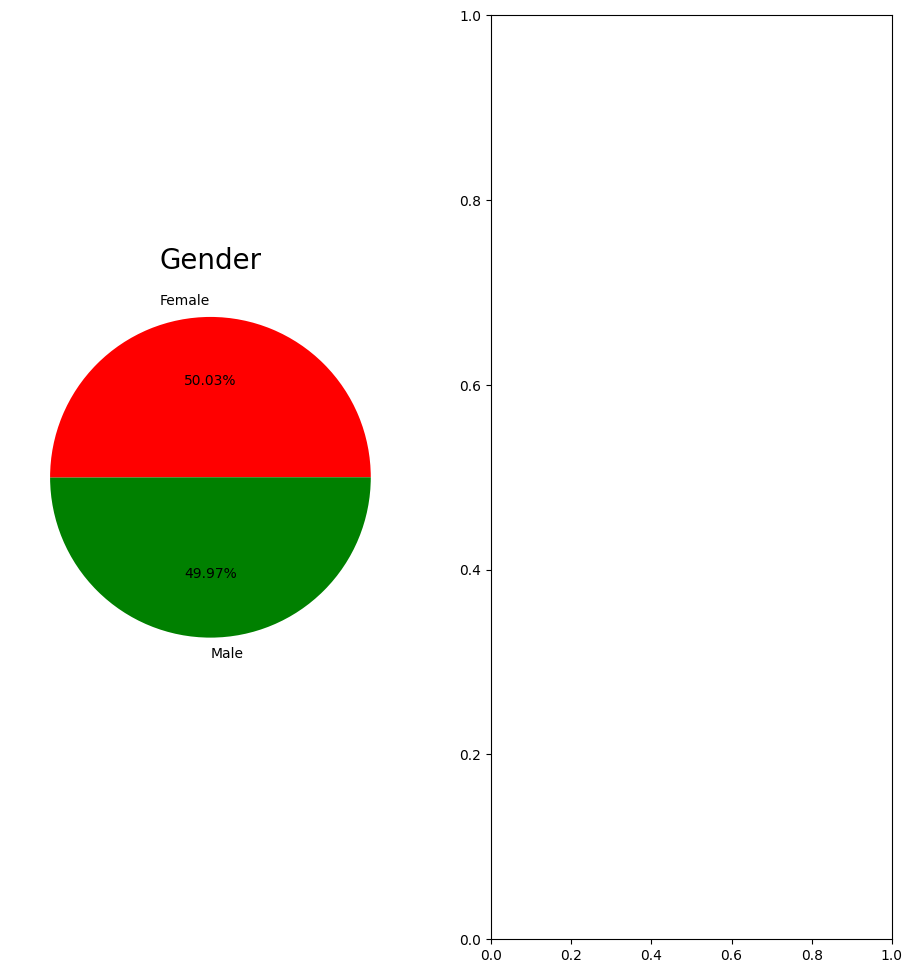

In [22]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size_gender = df['gender'].value_counts()
labels_gender = ['Female', 'Male']
colors_gender = ['red', 'green']

plt.pie(size_gender, colors=colors_gender, labels=labels_gender, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size_race_ethnicity = df['race/ethnicity'].value_counts()  # Corrected line accessing 'race/ethnicity'
labels_race_ethnicity = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors_race_ethnicity = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size_race_ethnicity, colors=colors_race_ethnicity, labels=labels_race_ethnicity, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)  # Add missing subplot index 3
plt.axis('off')  # Empty subplot

plt.subplot(1, 5, 4)
size_test_preparation = df['test preparation course'].value_counts()  # Assuming the column name is 'test preparation course'
labels_test_preparation = ['None', 'Completed']
colors_test_preparation = ['red', 'green']

plt.pie(size_test_preparation, colors=colors_test_preparation, labels=labels_test_preparation, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size_parental_education = df['parental level of education'].value_counts()  # Assuming the column name is 'parental level of education'
labels_parental_education = ["Some College", "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors_parental_education = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size_parental_education, colors=colors_parental_education, labels=labels_parental_education, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

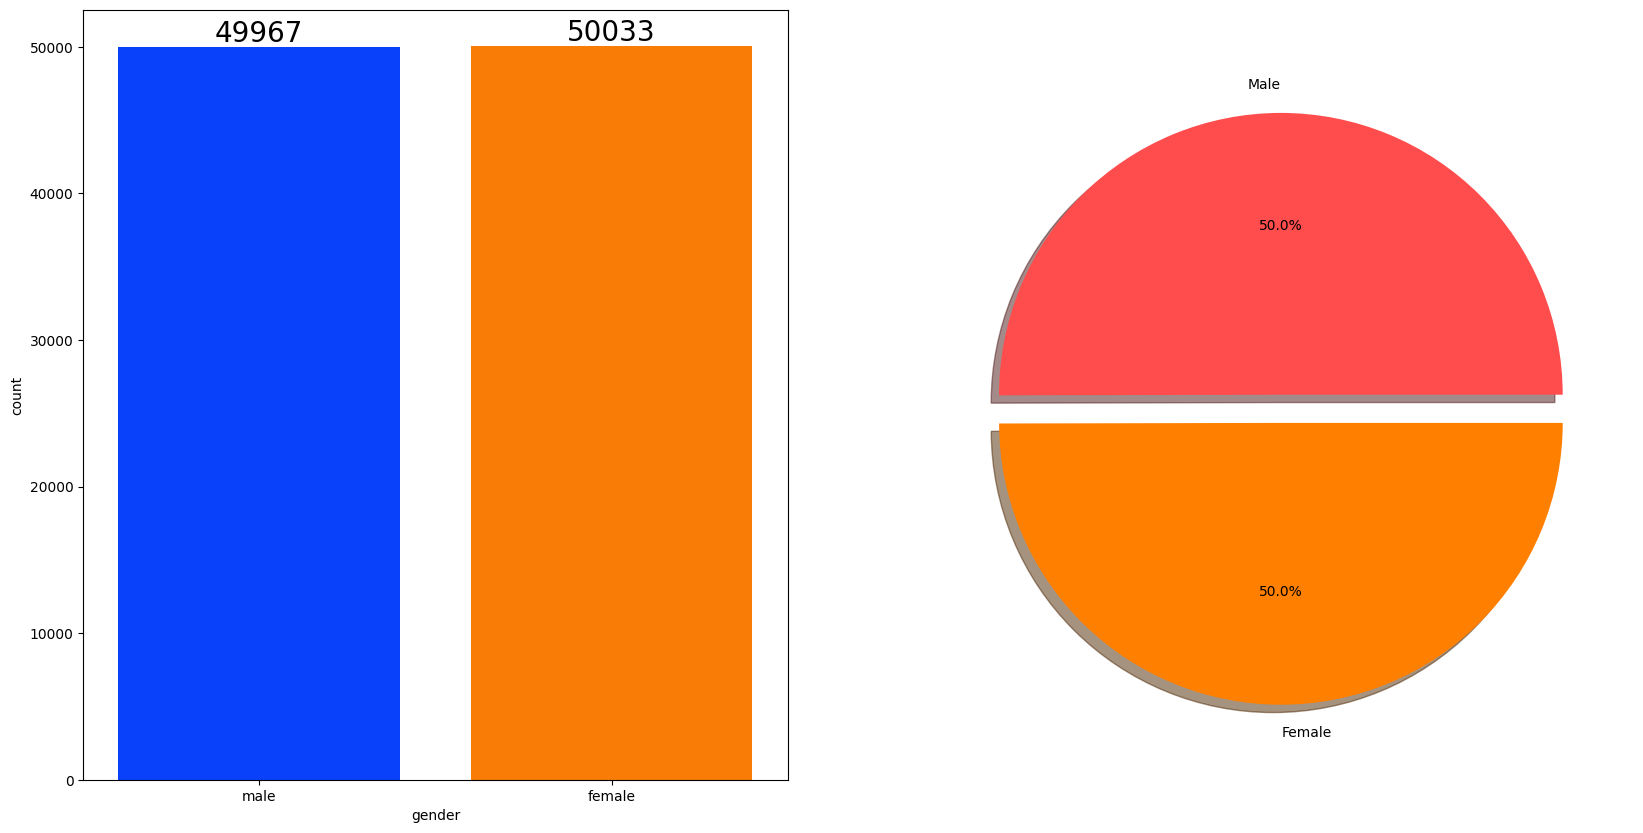

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Gender has balanced data with female students are 50033(50%) and male students are 49967(50%)

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'parental level of education' column exists and contains any missing values
if 'parental level of education' in df.columns and not df['parental level of education'].isnull().any():
    plt.rcParams['figure.figsize'] = (15, 9)
    plt.style.use('fivethirtyeight')
    sns.countplot(x='parental level of education', data=df, palette='Blues')
    plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
    plt.xlabel('Degree', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()
else:
    print("Error: 'parental level of education' column not found or contains missing values.")


Error: 'parental level of education' column not found or contains missing values.


BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [24]:
import matplotlib.pyplot as plt

# Check if the columns being averaged are numeric
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

if 'parental level of education' in df.columns and not df['parental level of education'].isnull().any() and len(numeric_columns) > 0:
    df.groupby('parental level of education').agg('mean').plot(kind='barh', figsize=(10, 10))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Adjust legend position
    plt.title('Mean Scores by Parental Education', fontsize=20)
    plt.xlabel('Mean Score', fontsize=14)
    plt.ylabel('Parental Education Level', fontsize=14)
    plt.show()
else:
    print("Error: 'parental level of education' column not found, contains missing values, or there are no numeric columns for averaging.")


Error: 'parental level of education' column not found, contains missing values, or there are no numeric columns for averaging.


 CHECKING OUTLIERS

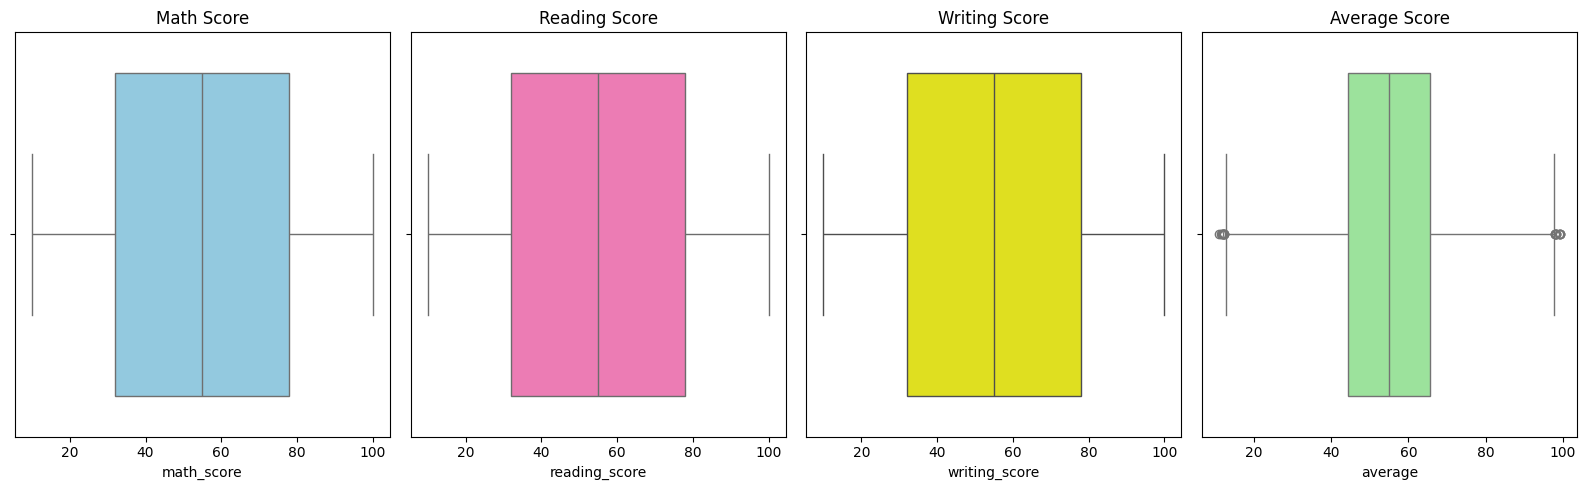

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average score
df['average'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

# Plot boxplots
sns.boxplot(ax=axes[0], x=df['math_score'], color='skyblue')
axes[0].set_title('Math Score')

sns.boxplot(ax=axes[1], x=df['reading_score'], color='hotpink')
axes[1].set_title('Reading Score')

sns.boxplot(ax=axes[2], x=df['writing_score'], color='yellow')
axes[2].set_title('Writing Score')

sns.boxplot(ax=axes[3], x=df['average'], color='lightgreen')
axes[3].set_title('Average Score')

plt.tight_layout()
plt.show()


Conclusions

* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.